In [1]:
import pandas as pd
import numpy as np
import smogn
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,roc_auc_score,precision_score,recall_score,f1_score

In [2]:
import lightgbm as lgb
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [3]:
from sklearn.preprocessing import StandardScaler


X_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [4]:
y_2_train = np.load('y_2_train.npy')
y_2_test = np.load('y_2_test.npy')
y_3_train = np.load('y_3_train.npy')
y_3_test = np.load('y_3_test.npy')

X_train_class = np.copy(X_train)
y_train_class = np.copy(y_train)
X_test_class = np.copy(X_test)
y_test_class = np.copy(y_test)

scaler = StandardScaler().fit(X_train_class)
X_train_class = scaler.transform(X_train_class)
X_test_class = scaler.transform(X_test_class)


In [5]:
volume_train = np.load('y_4_train.npy') #np.load('volume_train.npy')
volume_test = np.load('y_4_test.npy') #np.load('volume_test.npy')
intensity_train = np.load('y_5_train.npy') #np.load('intensity_train.npy')
intensity_test = np.load('y_5_test.npy') #np.load('intensity_test.npy')

In [6]:
# RRegression Values modeifications
#y_2_train[y_2_train > 10] = 10.0
#y_2_test[y_2_test > 10] = 10.0



In [7]:
X_train = np.concatenate((X_train, volume_train.reshape(-1, 1), intensity_train.reshape(-1, 1)), axis=1)
X_test = np.concatenate((X_test,  volume_test.reshape(-1, 1), intensity_test.reshape(-1, 1)), axis=1)

In [8]:
print(X_train.shape, X_test.shape)

(2552, 22) (639, 22)


In [9]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
#lgb_train = lgb.Dataset(X_train, y_2_train)


In [11]:
print(X_train)

[[-0.45880693 -0.16513392 -0.03903187 ... -0.39361402 -0.43030746
  -0.46657918]
 [ 1.24676524  1.33336874  1.42359704 ... -0.62218796  0.37173189
   0.52025907]
 [ 1.63051898  1.41899747  1.46661554 ... -0.49299399 -0.39211511
  -0.37686661]
 ...
 [ 0.69245428  0.64833895  0.69228259 ... -0.00603212 -0.39211511
  -0.42172289]
 [-0.92783928 -0.97860679 -1.07147581 ...  2.40890126 -0.43030746
  -0.46657918]
 [-1.48215024 -1.83489403 -2.23297523 ...  0.04365787 -0.37301893
  -0.42172289]]


In [12]:
'''
polynom_fit_SMOTE_bus,
polynom_fit_SMOTE_star,
ROSE,
Gazzah,
SPY,
MSMOTE,
AHC,
RWO_sampling,
polynom_fit_SMOTE_mesh,
polynom_fit_SMOTE_poly
'''

'\npolynom_fit_SMOTE_bus,\npolynom_fit_SMOTE_star,\nROSE,\nGazzah,\nSPY,\nMSMOTE,\nAHC,\nRWO_sampling,\npolynom_fit_SMOTE_mesh,\npolynom_fit_SMOTE_poly\n'

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import smote_variants as sv
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
import sklearn.datasets as datasets
from sklearn.neural_network import MLPClassifier

dataset= {'data': X_train,
          'target': y_train,
          'name': 'Andromeda'}

classifier = LGBMClassifier(boosting_type="gbdt",is_unbalance=True, random_state=5, 
                  n_estimators=300,num_leaves=30, max_depth=2,feature_fraction=0.5, 
                  bagging_fraction=0.8, bagging_freq=15, learning_rate=0.01)




# Classifier Testing

# training the best techniques using the entire dataset
X_samp, y_samp= sv.Gazzah(proportion=3.0).sample(X_train, y_train)
classifier.fit(X_samp, y_samp)
preds2 = classifier.predict(X_test)
print(X_test)
print('Acc Score: ',accuracy_score(y_test, preds2))
print('Roc Auc Score: ',roc_auc_score(y_test, preds2))
print('Precision Score: ',precision_score(y_test, preds2))
print('Recall Score: ',recall_score(y_test, preds2))
print('f1 score: ',f1_score(y_test, preds2))
preds_train = classifier.predict(X_train)



2023-03-22 16:51:55,385:INFO:Gazzah: Running sampling via ('Gazzah', "{'proportion': 3.0, 'n_components': 2, 'n_jobs': 1, 'random_state': None, 'class_name': 'Gazzah'}")
2023-03-22 16:51:55,387:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 3.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2023-03-22 16:51:55,387:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 3.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2023-03-22 16:51:55,449:INFO:Gazzah: Removing 660 majority samples


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[[ 0.22342193  0.04893789 -0.12506886 ... -1.03958385 -0.43030746
  -0.46657918]
 [-1.1410358  -1.10704988 -1.2005313  ... -0.82094791  0.31444336
   0.38569022]
 [-0.84256067 -1.06423552 -1.1575128  ... -0.10541209 -0.43030746
  -0.46657918]
 ...
 [ 0.05286472  0.22019534  0.26209761 ...  0.98776763 -0.39211511
  -0.46657918]
 [-0.0750532  -0.16513392 -0.16808736 ... -0.30417204 -0.41121128
  -0.46657918]
 [ 0.60717567 -0.03669083 -0.85638332 ...  1.1169616   2.07129144
   3.83962409]]
Acc Score:  0.9765258215962441
Roc Auc Score:  0.9503658744114811
Precision Score:  0.8484848484848485
Recall Score:  0.9180327868852459
f1 score:  0.8818897

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, preds2)

array([[568,  10],
       [  5,  56]], dtype=int64)

In [15]:
# Preparing prediction out
X_test = np.concatenate((X_test, preds2.reshape(-1, 1)), axis=1)
X_train = np.concatenate((X_train, preds_train.reshape(-1, 1)), axis=1)
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

lgb_eval = lgb.Dataset(X_test, y_2_test)

lgb_train = lgb.Dataset(X_train, y_2_train)



In [16]:
print(X_train.shape)

(2552, 23)


In [17]:
# defining parameters 
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 50,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=200)

[1]	valid_0's l2: 3.77029	valid_0's l1: 0.766199
Training until validation scores don't improve for 200 rounds
[2]	valid_0's l2: 3.47012	valid_0's l1: 0.731884
[3]	valid_0's l2: 3.22599	valid_0's l1: 0.700733
[4]	valid_0's l2: 2.98296	valid_0's l1: 0.669793
[5]	valid_0's l2: 2.79693	valid_0's l1: 0.642598
[6]	valid_0's l2: 2.62807	valid_0's l1: 0.616995
[7]	valid_0's l2: 2.47564	valid_0's l1: 0.593236
[8]	valid_0's l2: 2.31113	valid_0's l1: 0.56959
[9]	valid_0's l2: 2.18553	valid_0's l1: 0.548433
[10]	valid_0's l2: 2.06592	valid_0's l1: 0.528029
[11]	valid_0's l2: 1.97121	valid_0's l1: 0.509379
[12]	valid_0's l2: 1.88016	valid_0's l1: 0.4917
[13]	valid_0's l2: 1.79716	valid_0's l1: 0.474775
[14]	valid_0's l2: 1.72648	valid_0's l1: 0.458754
[15]	valid_0's l2: 1.64773	valid_0's l1: 0.443048
[16]	valid_0's l2: 1.58132	valid_0's l1: 0.428339
[17]	valid_0's l2: 1.52843	valid_0's l1: 0.415347
[18]	valid_0's l2: 1.47591	valid_0's l1: 0.402394
[19]	valid_0's l2: 1.41992	valid_0's l1: 0.389857


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[79]	valid_0's l2: 0.72082	valid_0's l1: 0.178731
[80]	valid_0's l2: 0.720273	valid_0's l1: 0.178344
[81]	valid_0's l2: 0.719189	valid_0's l1: 0.177283
[82]	valid_0's l2: 0.718967	valid_0's l1: 0.177019
[83]	valid_0's l2: 0.718876	valid_0's l1: 0.176809
[84]	valid_0's l2: 0.717767	valid_0's l1: 0.17606
[85]	valid_0's l2: 0.71768	valid_0's l1: 0.175949
[86]	valid_0's l2: 0.716708	valid_0's l1: 0.175493
[87]	valid_0's l2: 0.716252	valid_0's l1: 0.175295
[88]	valid_0's l2: 0.715552	valid_0's l1: 0.175004
[89]	valid_0's l2: 0.715231	valid_0's l1: 0.174942
[90]	valid_0's l2: 0.71441	valid_0's l1: 0.174187
[91]	valid_0's l2: 0.714182	valid_0's l1: 0.174214
[92]	valid_0's l2: 0.712861	valid_0's l1: 0.17396
[93]	valid_0's l2: 0.712215	valid_0's l1: 0.173316
[94]	valid_0's l2: 0.712001	valid_0's l1: 0.173311
[95]	valid_0's l2: 0.711385	valid_0's l1: 0.173
[96]	valid_0's l2: 0.711143	valid_0's l1: 0.172934
[97]	valid_0's l2: 0.710506	valid_0's l1: 0.172353
[98]	valid_0's l2: 0.710273	valid_0's 

In [18]:
preds = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [20]:
mean_squared_error(y_2_test, preds)

0.7074299433680649

In [21]:
mean_absolute_error(y_2_test, preds)

0.17188966527637103

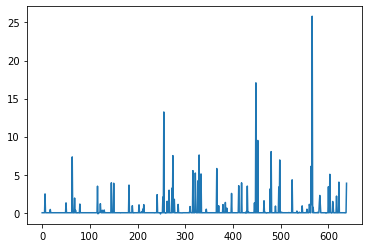

In [22]:
plt.plot(preds)

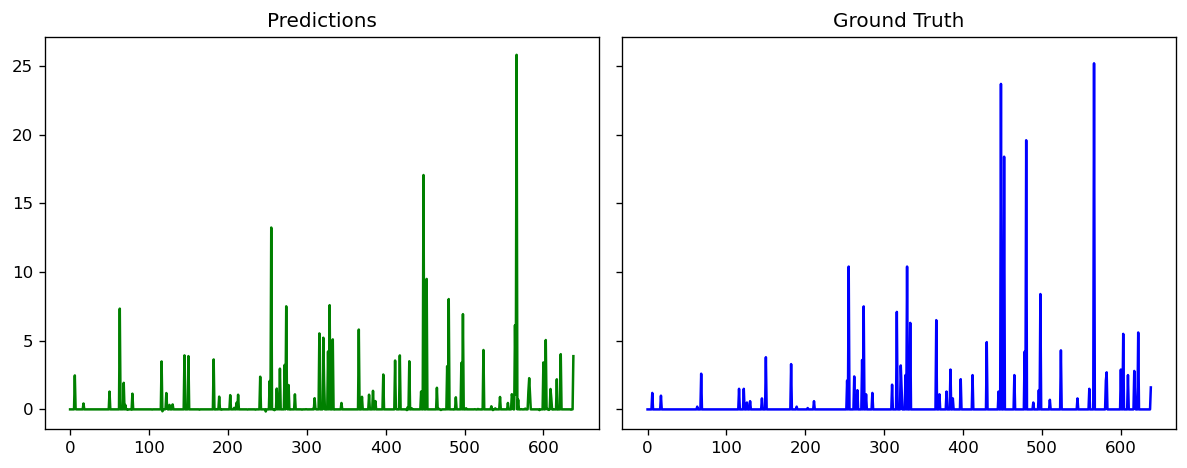

In [23]:
# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)

# Plot
ax1.plot(preds, 'g')  # greendots
ax2.plot(y_2_test, 'b')  # bluestart

# Title, X and Y labels, X and Y Lim
ax1.set_title('Predictions'); ax2.set_title('Ground Truth')

  # y axis limits

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

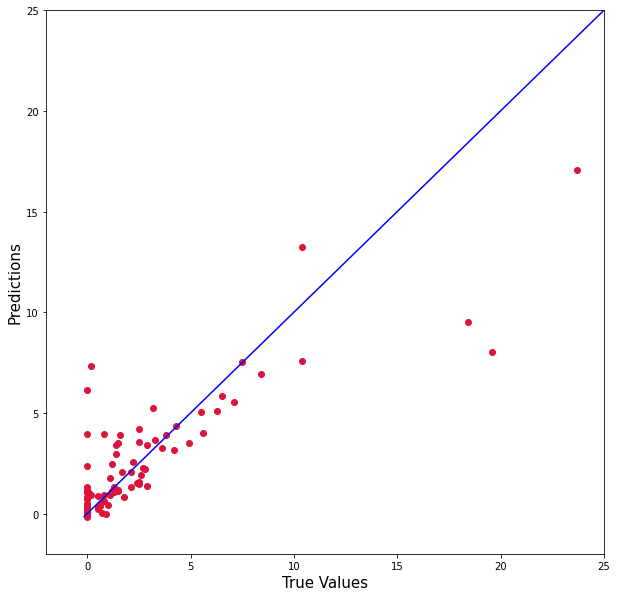

In [24]:
predicted_value = preds
true_value = y_2_test
fig = plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
plt.xlim([-2, 25])
plt.ylim([-2, 25])
plt.show()
fig.savefig('predictions_vs_true_real_percipitation_lgbm.pdf')

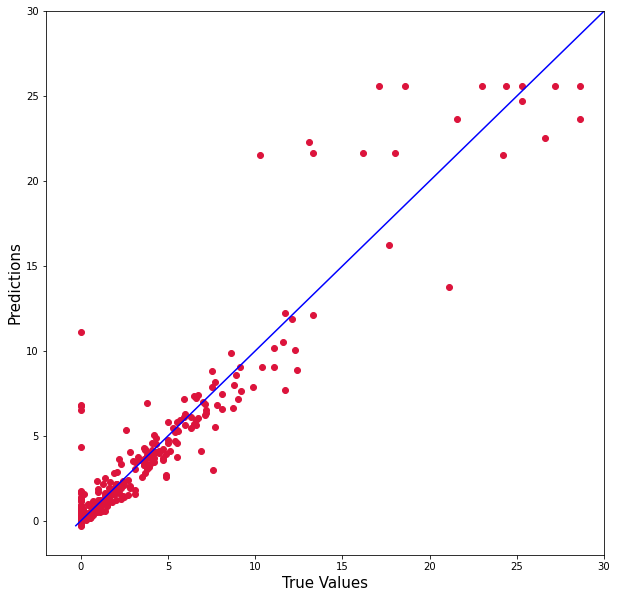

<Figure size 432x288 with 0 Axes>

In [25]:

predicted_value = model.predict(X_train)
true_value = y_2_train
fig = plt.figure(figsize=(10,10))

plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
plt.xlim([-2, 30])
plt.ylim([-2, 30])
plt.show()

fig=plt.savefig('predictions_vs_true_readl_precipitation_training.pdf')

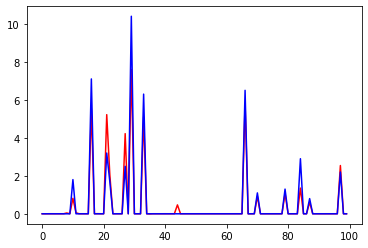

In [26]:
temp_true  = np.copy(y_2_test)
#temp_true[temp_true > 0] = 5
#preds[preds > 0] = 2
plt.plot(preds[300:400],'r', label='Prediction')
plt.plot(temp_true[300:400],'b', label='Ground Truth')
plt.show()

In [27]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
#temp_y_train = np.copy(y_2_train)
#temp_y_test = np.copy(y_2_test)
#temp_y_train[temp_y_train > 5] = 5.0
#temp_y_test[temp_y_train > 5] = 5.0
print(X_test.shape)

(639, 23)


In [29]:
np.digitize(y_test, [0, 1]) - 1
nb_classes = 2
y_train = np.eye(nb_classes)[y_train]
y_test = np.eye(nb_classes)[y_test]

import keras
from keras.layers import Dense, Softmax
model = keras.Sequential()
#model.add(Dense(69, kernel_initializer='normal', activation='relu', input_shape=(23,)))
model.add(Dense(16, kernel_initializer='normal', activation='relu', input_shape=(23,)))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(2, kernel_initializer='normal', activation='softmax'))
#loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy', )
model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=70, batch_size=64, shuffle=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

preds = model.predict(X_test)

print('Acc Score: ',accuracy_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1)))
print('Roc Auc Score: ',roc_auc_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1)))
#print('Precision Score: ',precision_score(y_test, preds))
#print('Recall Score: ',recall_score(y_test, preds))
print('f1 score: ',f1_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1)))


Epoch 1/70
40/40 [==============================] - 1s 6ms/step - loss: 0.6737 - accuracy: 0.8899 - val_loss: 0.6466 - val_accuracy: 0.9045
Epoch 2/70
40/40 [==============================] - 0s 3ms/step - loss: 0.5867 - accuracy: 0.9052 - val_loss: 0.4959 - val_accuracy: 0.9045
Epoch 3/70
40/40 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.9052 - val_loss: 0.2893 - val_accuracy: 0.9061
Epoch 4/70
40/40 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 0.9216 - val_loss: 0.1943 - val_accuracy: 0.9390
Epoch 5/70
40/40 [==============================] - 0s 3ms/step - loss: 0.1590 - accuracy: 0.9589 - val_loss: 0.1401 - val_accuracy: 0.9609
Epoch 6/70
40/40 [==============================] - 0s 2ms/step - loss: 0.1221 - accuracy: 0.9698 - val_loss: 0.1125 - val_accuracy: 0.9671
Epoch 7/70
40/40 [==============================] - 0s 2ms/step - loss: 0.1065 - accuracy: 0.9690 - val_loss: 0.1036 - val_accuracy: 0.9718
Epoch 8/70
40/40 [==

40/40 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9769 - val_loss: 0.0680 - val_accuracy: 0.9765
Epoch 60/70
40/40 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9769 - val_loss: 0.0686 - val_accuracy: 0.9781
Epoch 61/70
40/40 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9765 - val_loss: 0.0681 - val_accuracy: 0.9765
Epoch 62/70
40/40 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9784 - val_loss: 0.0693 - val_accuracy: 0.9781
Epoch 63/70
40/40 [==============================] - 0s 1ms/step - loss: 0.0532 - accuracy: 0.9788 - val_loss: 0.0687 - val_accuracy: 0.9765
Epoch 64/70
40/40 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9788 - val_loss: 0.0681 - val_accuracy: 0.9765
Epoch 65/70
40/40 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9784 - val_loss: 0.0686 - val_accuracy: 0.9765
Epoch 66/70
40/40 [======

In [30]:
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(preds, axis=1))

array([[569,   9],
       [  5,  56]], dtype=int64)

In [43]:
import keras
from keras.layers import Dense
model = keras.Sequential()
#model.add(Dense(69, kernel_initializer='normal', activation='relu', input_shape=(23,)))
model.add(Dense(12, kernel_initializer='normal', activation='relu', input_shape=(23,)))
model.add(Dense(5, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='relu'))
model.compile(loss='mse', optimizer='Adam', metrics='mse', )
model.fit(X_train, y_2_train, validation_data=(X_test, y_2_test), verbose=1, epochs=300, batch_size=64, shuffle=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

preds = model.predict(X_test)


Epoch 1/300
40/40 [==============================] - 0s 4ms/step - loss: 7.9651 - mse: 7.9651 - val_loss: 4.1611 - val_mse: 4.1611
Epoch 2/300
40/40 [==============================] - 0s 2ms/step - loss: 7.8622 - mse: 7.8622 - val_loss: 4.0405 - val_mse: 4.0405
Epoch 3/300
40/40 [==============================] - 0s 2ms/step - loss: 7.5348 - mse: 7.5348 - val_loss: 3.6876 - val_mse: 3.6876
Epoch 4/300
40/40 [==============================] - 0s 2ms/step - loss: 6.7163 - mse: 6.7163 - val_loss: 3.0053 - val_mse: 3.0053
Epoch 5/300
40/40 [==============================] - 0s 2ms/step - loss: 5.3309 - mse: 5.3309 - val_loss: 2.2383 - val_mse: 2.2383
Epoch 6/300
40/40 [==============================] - 0s 2ms/step - loss: 4.0159 - mse: 4.0159 - val_loss: 1.8439 - val_mse: 1.8439
Epoch 7/300
40/40 [==============================] - 0s 2ms/step - loss: 3.2018 - mse: 3.2018 - val_loss: 1.7055 - val_mse: 1.7055
Epoch 8/300
40/40 [==============================] - 0s 2ms/step - loss: 2.7508 - m

40/40 [==============================] - 0s 1ms/step - loss: 0.6893 - mse: 0.6893 - val_loss: 0.8805 - val_mse: 0.8805
Epoch 64/300
40/40 [==============================] - 0s 1ms/step - loss: 0.6947 - mse: 0.6947 - val_loss: 0.8816 - val_mse: 0.8816
Epoch 65/300
40/40 [==============================] - 0s 1ms/step - loss: 0.6924 - mse: 0.6924 - val_loss: 0.8779 - val_mse: 0.8779
Epoch 66/300
40/40 [==============================] - 0s 1ms/step - loss: 0.6924 - mse: 0.6924 - val_loss: 0.9067 - val_mse: 0.9067
Epoch 67/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6821 - mse: 0.6821 - val_loss: 0.8828 - val_mse: 0.8828
Epoch 68/300
40/40 [==============================] - 0s 1ms/step - loss: 0.6852 - mse: 0.6852 - val_loss: 0.8871 - val_mse: 0.8871
Epoch 69/300
40/40 [==============================] - 0s 1ms/step - loss: 0.6992 - mse: 0.6992 - val_loss: 0.9016 - val_mse: 0.9016
Epoch 70/300
40/40 [==============================] - 0s 1ms/step - loss: 0.6970 - mse: 0

Epoch 125/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5429 - mse: 0.5429 - val_loss: 0.9420 - val_mse: 0.9420
Epoch 126/300
40/40 [==============================] - 0s 1ms/step - loss: 0.5306 - mse: 0.5306 - val_loss: 0.9927 - val_mse: 0.9927
Epoch 127/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5387 - mse: 0.5387 - val_loss: 0.9751 - val_mse: 0.9751
Epoch 128/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5257 - mse: 0.5257 - val_loss: 0.9816 - val_mse: 0.9816
Epoch 129/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5236 - mse: 0.5236 - val_loss: 0.9819 - val_mse: 0.9819
Epoch 130/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5241 - mse: 0.5241 - val_loss: 0.9564 - val_mse: 0.9564
Epoch 131/300
40/40 [==============================] - 0s 1ms/step - loss: 0.5209 - mse: 0.5209 - val_loss: 0.9557 - val_mse: 0.9557
Epoch 132/300
40/40 [==============================] - 0s 2ms/step - 

40/40 [==============================] - 0s 2ms/step - loss: 0.4352 - mse: 0.4352 - val_loss: 1.0864 - val_mse: 1.0864
Epoch 187/300
40/40 [==============================] - 0s 2ms/step - loss: 0.4393 - mse: 0.4393 - val_loss: 1.0463 - val_mse: 1.0463
Epoch 188/300
40/40 [==============================] - 0s 2ms/step - loss: 0.4340 - mse: 0.4340 - val_loss: 1.0818 - val_mse: 1.0818
Epoch 189/300
40/40 [==============================] - 0s 2ms/step - loss: 0.4289 - mse: 0.4289 - val_loss: 1.0875 - val_mse: 1.0875
Epoch 190/300
40/40 [==============================] - 0s 2ms/step - loss: 0.4285 - mse: 0.4285 - val_loss: 1.0987 - val_mse: 1.0987
Epoch 191/300
40/40 [==============================] - 0s 2ms/step - loss: 0.4258 - mse: 0.4258 - val_loss: 1.1658 - val_mse: 1.1658
Epoch 192/300
40/40 [==============================] - 0s 2ms/step - loss: 0.4305 - mse: 0.4305 - val_loss: 1.1455 - val_mse: 1.1455
Epoch 193/300
40/40 [==============================] - 0s 2ms/step - loss: 0.4257 -

Epoch 248/300
40/40 [==============================] - 0s 2ms/step - loss: 0.3738 - mse: 0.3738 - val_loss: 1.2288 - val_mse: 1.2288
Epoch 249/300
40/40 [==============================] - 0s 2ms/step - loss: 0.3553 - mse: 0.3553 - val_loss: 1.2125 - val_mse: 1.2125
Epoch 250/300
40/40 [==============================] - 0s 3ms/step - loss: 0.3563 - mse: 0.3563 - val_loss: 1.1920 - val_mse: 1.1920
Epoch 251/300
40/40 [==============================] - 0s 2ms/step - loss: 0.3516 - mse: 0.3516 - val_loss: 1.1972 - val_mse: 1.1972
Epoch 252/300
40/40 [==============================] - 0s 2ms/step - loss: 0.3580 - mse: 0.3580 - val_loss: 1.2070 - val_mse: 1.2070
Epoch 253/300
40/40 [==============================] - 0s 2ms/step - loss: 0.3523 - mse: 0.3523 - val_loss: 1.2224 - val_mse: 1.2224
Epoch 254/300
40/40 [==============================] - 0s 2ms/step - loss: 0.3475 - mse: 0.3475 - val_loss: 1.2653 - val_mse: 1.2653
Epoch 255/300
40/40 [==============================] - 0s 2ms/step - 

In [44]:
mean_squared_error(y_2_test, preds)

1.2173337108987485

In [45]:
mean_absolute_error(y_2_test, preds)

0.23813594062703317

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


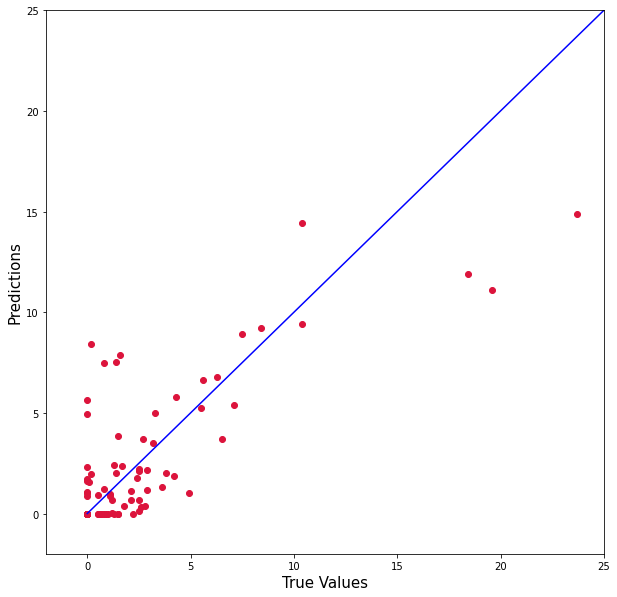

In [46]:
predicted_value = preds
true_value = y_2_test
fig = plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
plt.xlim([-2, 25])
plt.ylim([-2, 25])
plt.show()
fig.savefig('predictions_vs_true_real_percipitation_dnn.pdf')

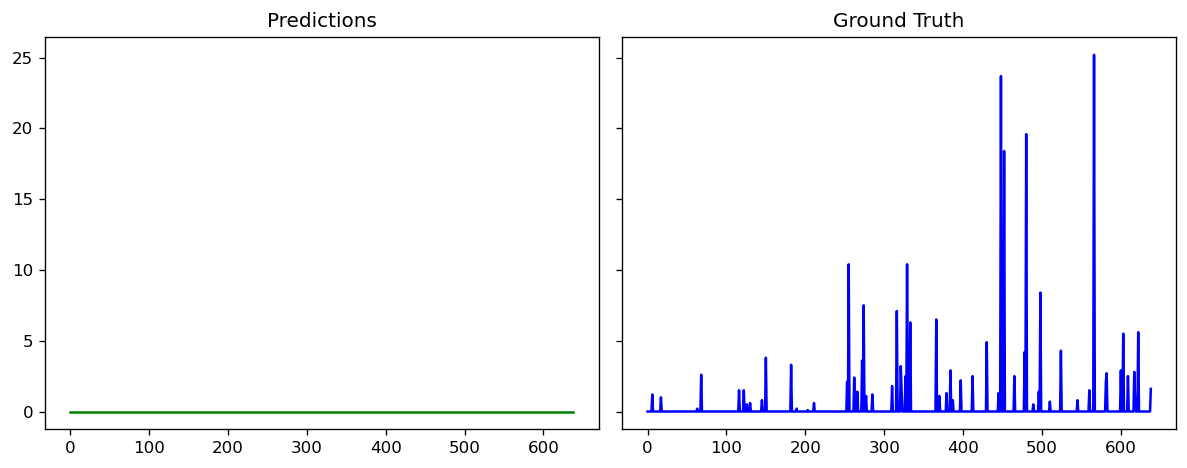

In [35]:
# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)

# Plot
ax1.plot(preds, 'g')  # greendots
ax2.plot(y_2_test, 'b')  # bluestart

# Title, X and Y labels, X and Y Lim
ax1.set_title('Predictions'); ax2.set_title('Ground Truth')

  # y axis limits

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

In [36]:
classifier.feature_importances_

array([  1,   3,   7,  10,   4,  14,   9,   9,  22,  15,   9,   7,   6,
         2,   5,  24,  37,   8,  17,  35, 341, 315])

In [37]:
features = ['HR-1', 'HR-2', 'HR-3', 'HR-4', 'HR-5', 'PB-1', 'PB-2', 'PB-3', 'PB-4','PB-5', 'T-1', 'T-2', 'T-3', 'T-4', 'T-5', 'VV-1', 'VV-2', 'VV-3','VV-4', 'VV-5', 'vol', 'intensity']

<BarContainer object of 22 artists>

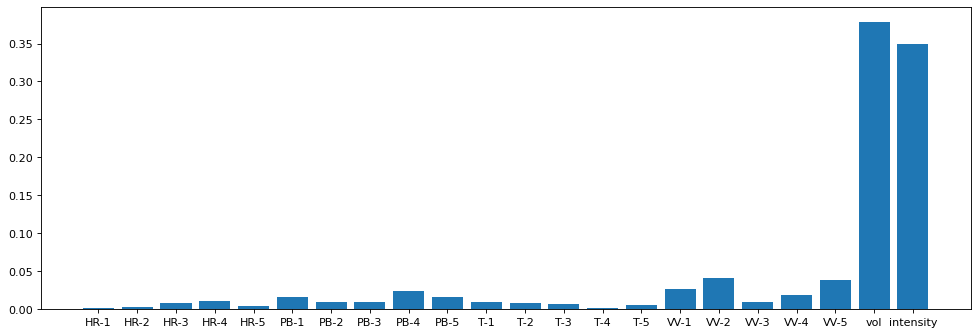

In [38]:
plt.figure(figsize=(15, 5), dpi=80)

plt.bar(features, classifier.feature_importances_ / np.sum(classifier.feature_importances_))

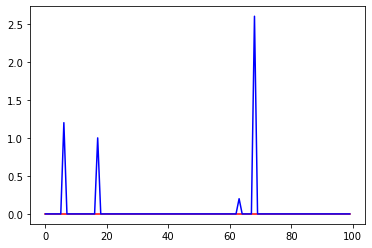

In [39]:
temp_true  = np.copy(y_2_test)
#temp_true[temp_true > 0] = 5
#preds[preds > 0] = 2
plt.plot(preds[0:100],'r', label='Prediction')
plt.plot(temp_true[0:100],'b', label='Ground Truth')
plt.show()

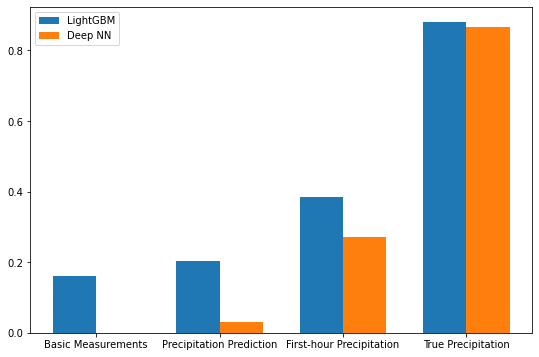

In [40]:
data_lgbm = [0.161, 0.204, 0.3846, 0.88]
data_nn = [0, 0.03, 0.27, 0.866]
fig, ax = plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(6)
settings = ['Basic Measurements', 'Precipitation Prediction', 'First-hour Precipitation', 'True Precipitation']

x = np.arange(len(settings))
width = 0.35

bar = ax.bar(x - width/2, data_lgbm, width, label='LightGBM')
bar = ax.bar(x + width/2, data_nn, width, label='Deep NN')

ax.set_xticks(x)
ax.set_xticklabels(settings)
ax.legend()
plt.show()
fig.savefig('f1_score.pdf')

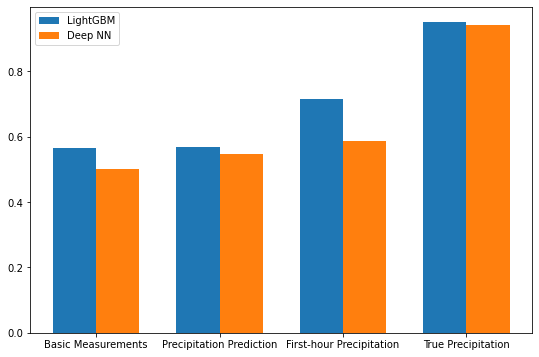

In [41]:
data_lgbm = [0.5639, 0.5682, 0.7161, 0.95]
data_nn = [0.5, 0.547, 0.5861, 0.94]
fig, ax = plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(6)
settings = ['Basic Measurements', 'Precipitation Prediction', 'First-hour Precipitation', 'True Precipitation']

x = np.arange(len(settings))
width = 0.35

bar = ax.bar(x - width/2, data_lgbm, width, label='LightGBM')
bar = ax.bar(x + width/2, data_nn, width, label='Deep NN')

ax.set_xticks(x)
ax.set_xticklabels(settings)
ax.legend()
plt.show()
fig.savefig('AUC_score.pdf')

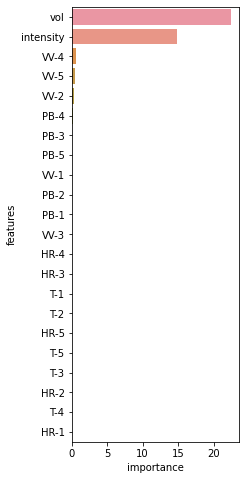

In [47]:
# plot feature importance
import seaborn as sns
features = ['HR-1', 'HR-2', 'HR-3', 'HR-4', 'HR-5', 'PB-1', 'PB-2', 'PB-3', 'PB-4','PB-5', 'T-1', 'T-2', 'T-3', 'T-4', 'T-5', 'VV-1', 'VV-2', 'VV-3','VV-4', 'VV-5', 'vol', 'intensity']
fi_df = pd.DataFrame(features, columns=['features'])
fi_df['importance'] = classifier.booster_.feature_importance(importance_type="gain") / 15000
fig, ax = plt.subplots(1, 1, figsize=(3, 8))
sns.barplot(
    x='importance'
    , y='features'
    , data=fi_df.sort_values(by=['importance'], ascending=False)
    , ax=ax
)

fig.savefig("feature_importance_real_precipitation.pdf",bbox_inches='tight')